In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#externo = pd.read_csv('./externo.csv')
interno = pd.read_csv('./interno.csv')

In [4]:

interno['SEMENTE'] = interno['SEMENTE'].str.replace(".jpg", "")

C:\Users\cezar\AppData\Local\Temp\ipykernel_3932\924147986.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  interno['SEMENTE'] = interno['SEMENTE'].str.replace(".jpg", "")


In [5]:
#externo['SEMENTE'] = externo['SEMENTE'].str.replace(".jpg", "")

In [6]:
interno['SEMENTE'] = interno['SEMENTE'].astype(int)
#externo['SEMENTE'] = externo['SEMENTE'].astype(int)

In [7]:
dados = pd.read_csv('./dados.csv')

In [8]:
dados.rename(columns={"REPETIÇÃO":"REPETICAO"}, inplace=True)

In [9]:
interno

,LOTE,REPETICAO,SEMENTE,0,1,2,3,4,5,6,...,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607
0,10,2,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,10,2,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,10,2,11,0.392157,0.380392,0.439216,0.415686,0.403922,0.466667,0.403922,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,10,2,12,0.000000,0.000000,0.000000,0.352941,0.301961,0.364706,0.290196,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,10,2,13,0.000000,0.000000,0.000000,0.294118,0.247059,0.305882,0.286275,...,0.0,0.0,0.0,0.0,0.298039,0.258824,0.321569,0.301961,0.27451,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,9,2,50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
446,9,2,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
447,9,2,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
448,9,2,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [10]:
df_test = dados.merge(interno, how="right")

<AxesSubplot: >

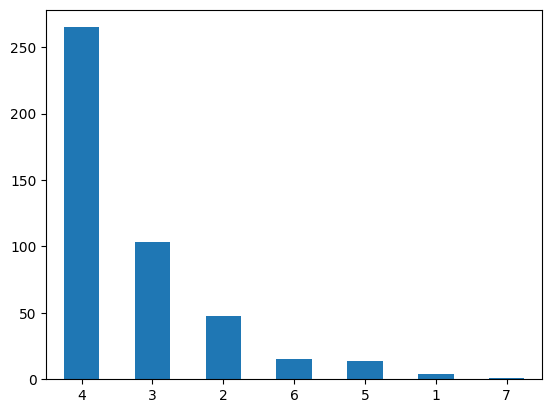

In [11]:
df_test['CLASSE'].value_counts().plot.bar(rot=0)

<AxesSubplot: >

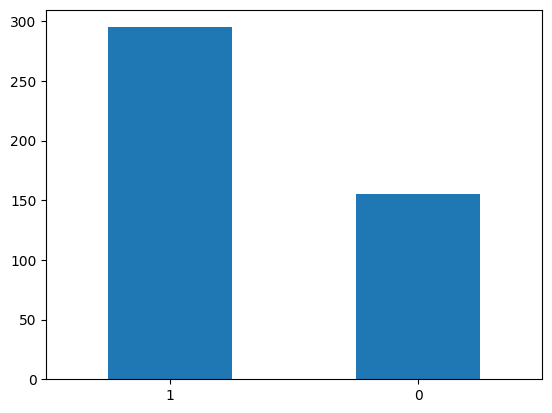

In [12]:
df_test['VIGOR'].value_counts().plot.bar(rot=0)

In [13]:
df_test.drop(['LOTE', 'REPETICAO', 'SEMENTE'], inplace=True, axis=1)

In [14]:
df_test.dropna(inplace=True)

In [15]:
df_test.to_csv('df_interno.csv', index_label=False)

In [16]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [17]:
classe = df_test['CLASSE']

In [18]:
vigor = df_test['VIGOR']

In [19]:
df_test.drop(['CLASSE', 'VIGOR'], inplace=True, axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_test, vigor, test_size=0.25)

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [33]:
clf.score(X_test, y_test)

0.6194690265486725

In [21]:
from classificadores import *

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [23]:
pred=clf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        35
           1       0.69      0.78      0.73        78

    accuracy                           0.61       113
   macro avg       0.51      0.51      0.50       113
weighted avg       0.58      0.61      0.59       113



In [24]:
mlpclassificator(df_test, classe, 10)

In [ ]:
knnclassificator(df_test, classe, 10)

In [ ]:
svmclassificator(df_test, classe, 10)

In [ ]:
ramdomForestClassificator(df_test, classe, 10)

--Classificator--
The classificator is: GB
0.5022 accuracy with a standard deviation of 0.0523
0.1493 precision with a standard deviation of 0.0479
0.1545 recall with a standard deviation of 0.0228
0.1361 F1 with a standard deviation of 0.0272
-----------------------------------------------------------
Gradient Boosting, Hold out, Acc =  0.5555555555555556
-----------------------------------------------------------


In [ ]:
naivesBayesClassificator(df_test, classe, 10)

--Classificator--
The classificator is: SVM
0.5651 accuracy with a standard deviation of 0.0078
0.1018 precision with a standard deviation of 0.0102
0.1800 recall with a standard deviation of 0.0163
0.1300 F1 with a standard deviation of 0.0126
-----------------------------------------------------------
SVM, Hold out, Acc =  0.6444444444444445
-----------------------------------------------------------


In [ ]:
dicisionTreeClassificator(df_test, classe, 10)

NameError: name 'dicisionTreeClassificator' is not defined

In [ ]:
extraTreeClassificator(df_test, classe, 10)

--Classificator--
The classificator is: RF
0.6156 accuracy with a standard deviation of 0.0667
0.5145 precision with a standard deviation of 0.1939
0.5144 recall with a standard deviation of 0.0655
0.4559 F1 with a standard deviation of 0.0823
-----------------------------------------------------------
Random Forest, Hold out, Acc =  0.6074074074074074
-----------------------------------------------------------


In [ ]:
adaBoostClassificator(df_test, classe, 10)

--Classificator--
The classificator is: MLP
0.5074 accuracy with a standard deviation of 0.1259
0.1848 precision with a standard deviation of 0.0977
0.1932 recall with a standard deviation of 0.0167
0.1440 F1 with a standard deviation of 0.0388
-----------------------------------------------------------
Saída da rede:	 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Saída desejada:	 445    4
360    4
159    2
90     2
47     4
      ..
124    4
174    5
361    4
14     4
354    4
Name: CLASSE, Length: 180, dtype: int64
-----------------------------------------------------------
Score:  0.6111111111111112
MLP, hold out:  0.6111111111111112


In [ ]:
gradienteBooClassificator(df_test, classe, 10)